# 1) Creating The Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/10-diamonds.csv")
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
4013,4014,0.79,Very Good,F,SI1,62.9,57.0,3519,5.86,5.94,3.71
41645,41646,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
24416,24417,2.08,Premium,H,SI2,62.8,60.0,12655,8.12,8.03,5.07
32591,32592,0.32,Ideal,G,VVS1,62.1,54.0,802,4.40,4.43,2.74
23439,23440,1.70,Very Good,D,SI2,60.8,59.0,11431,7.76,7.83,4.75
51867,51868,0.78,Ideal,J,VS1,61.4,57.0,2426,5.90,5.93,3.63
42196,42197,0.58,Good,G,VS2,63.2,58.0,1287,5.36,5.28,3.36
13997,13998,1.01,Ideal,G,SI1,62.6,56.0,5698,6.37,6.41,4.00
11703,11704,0.34,Premium,H,VS1,61.6,59.0,596,4.49,4.54,2.78
11192,11193,1.00,Ideal,G,SI1,61.6,55.0,4956,6.51,6.41,3.98


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

df.drop(df[df["x"] == 0].index, inplace=True)
df.drop(df[df["y"] == 0].index, inplace=True )
df.drop(df[df["z"] == 0].index, inplace=True )

df = df[df["y"] <= 20]
df = df[(df["z"] >= 2) & (df["z"] <= 30)]
df = df[(df["table"] <= 75) & (df["table"] >= 40)]
df = df[(df["depth"] <= 75) & (df["depth"] >= 45)]

In [4]:
from sklearn.model_selection import train_test_split

X=df.drop("price", axis=1)
y=df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

## A) Encoders Dict

In [5]:
from sklearn.preprocessing import LabelEncoder

encoders = {} # BU KISIM MLOPS İÇİN ÖNEMLİ
for col in ["cut", "color", "clarity"]:
    encoders[col] = LabelEncoder()
    X_train[col] = encoders[col].fit_transform(X_train[col]) # trainde fit transform
    X_test[col] = encoders[col].transform(X_test[col])       # testte sadece transform


In [6]:
from sklearn.preprocessing import StandardScaler
scaler         = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [7]:
#SVR
from sklearn.svm import SVR

svr = SVR(C=1000, gamma=0.1, kernel ="rbf")
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

Mean absolute error:  480.6663510891438
Mean squared error:  874992.2341646847
R2 Score:  0.945542169060366


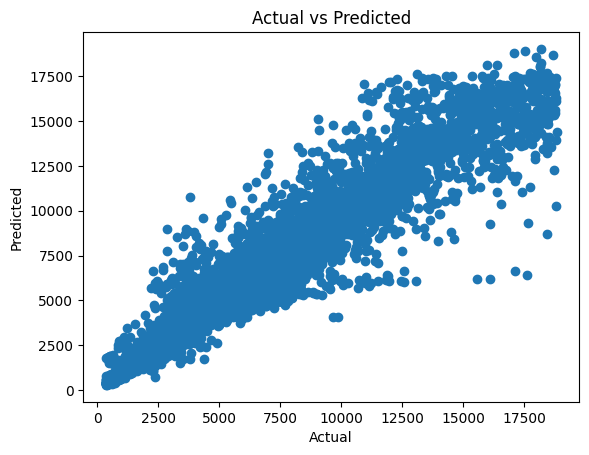

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("R2 Score: ", score)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# 2) Pickle

In [9]:
import pickle 

with open("The_Model.pkl", "wb") as f:
    pickle.dump(
        {
            "model" : svr,
            "encoders" : encoders,
            "scaler" : scaler
        }
        ,f)

In [10]:
pd.DataFrame(X_test_scaled).to_csv("testdatascaled.csv", index=False)